<a href="https://colab.research.google.com/github/robbieadam/TugasScrappingSerpAPI_0037/blob/main/ClustersnsScrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 20.9 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=9d791cd6fcbef284e5aa8a7cd0c4f1b5a8cb6c0e84196e8d9300b9d5589f4aab
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [3]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [4]:
import pandas as pd
datatw=[]

In [5]:
keywords=['iPhone14']
start="2022–10–01"
end ="2022–10–10"
max_num=500
fname='tweet.json' 
languages=['de','en']

In [6]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}

            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

{"id": 1581961910437617664, "username": "PS5OnlyUAE", "date": "2022-10-17 10:54:45+00:00", "text": "Apple iPhone 14 Pro - Space Black\n\n128gb: https://t.co/SI8Q0ouoOq\n256gb: https://t.co/lsZ0mAQR52\n\nApple iPhone 14 Pro - Gold\n\n128gb: https://t.co/LXo6cl44yo\n1TB: https://t.co/44LwpFi5aA\n\nApple iPhone 14 Pro - Silver\n\n128gb: https://t.co/zFdLW7E94k\n256gb: https://t.co/3AG7YfKwSa", "url": "https://twitter.com/PS5OnlyUAE/status/1581961910437617664"}
{"id": 1581961775385579521, "username": "twkokoa_ru", "date": "2022-10-17 10:54:13+00:00", "text": "●Amazon\nApple iPhone 14 Plus 128GB (PRODUCT)RED - SIMフリー 5G対応\n\n⬇️商品詳細\nhttps://t.co/X3pGCNBFPZ\n\n134800円\n19:54\n#iPhone #Apple", "url": "https://twitter.com/twkokoa_ru/status/1581961775385579521"}
{"id": 1581961773598769152, "username": "lmouz1", "date": "2022-10-17 10:54:12+00:00", "text": "iPhone 14 SIM not supported? Don’t try to fix it yourself https://t.co/HRZ95ruiNs", "url": "https://twitter.com/lmouz1/status/15819617735987

In [7]:
>>> import nltk
>>> nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 25.9 MB/s 


In [9]:
datatw

['Apple iPhone 14 Pro - Space Black\n\n128gb: https://t.co/SI8Q0ouoOq\n256gb: https://t.co/lsZ0mAQR52\n\nApple iPhone 14 Pro - Gold\n\n128gb: https://t.co/LXo6cl44yo\n1TB: https://t.co/44LwpFi5aA\n\nApple iPhone 14 Pro - Silver\n\n128gb: https://t.co/zFdLW7E94k\n256gb: https://t.co/3AG7YfKwSa',
 '●Amazon\nApple iPhone 14 Plus 128GB (PRODUCT)RED - SIMフリー 5G対応\n\n⬇️商品詳細\nhttps://t.co/X3pGCNBFPZ\n\n134800円\n19:54\n#iPhone #Apple',
 'iPhone 14 SIM not supported? Don’t try to fix it\xa0yourself https://t.co/HRZ95ruiNs',
 "It's RAINING iPhones DAILY on @postpeapp ⛈️📱📱\n\ni'm playing postpe super strikers, and I just won ₹26 cashback 🏏💥 \n\njoin me and you can win an iPhone 14 every day, along with guaranteed rewards on every transaction 💸🤑\n\nready to strike it? #playnow #postpesuperstrikers",
 '@mrcringe61 @DeadinsideS22 He’s comparing the 13 Pro Max USD price to the iPhone 14 CAD price https://t.co/gOeo0nIlLx',
 '@otto_de So bekommt man das schnell und richtig habe am 6. Oktober bestellt u

In [10]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [11]:
documents_clean[0:5]

['apple iphone pro space black gb https t co siqouooq gb https t co lszmaqr apple iphone pro gold gb https t co lxoclyo tb https t co lwpfiaa apple iphone pro silver gb https t co zfdlwek gb https t co agyfkwsa',
 'amazon apple iphone plus gb product red sim g https t co xpgcnbfpz iphone apple',
 'iphone sim not supported don t try to fix it yourself https t co hrzruins',
 'it s raining iphones daily on postpeapp i m playing postpe super strikers and i just won cashback join me and you can win an iphone every day along with guaranteed rewards on every transaction ready to strike it playnow postpesuperstrikers',
 'mrcringe deadinsides he s comparing the pro max usd price to the iphone cad price https t co goeonillx']

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

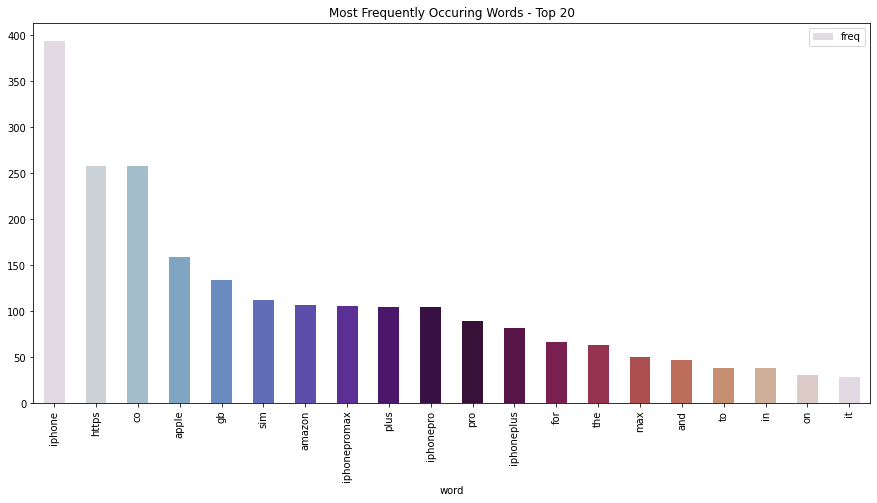

In [13]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [14]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [15]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 iphone
 https
 co
 apple
 gb
 sim
 iphonepromax
 iphonepro
 amazon
 plus
Cluster 1:
 co
 https
 iphone
 gb
 pro
 apple
 max
 lygjupmnaw
 dosfikrai
 cfnkdxmid
Cluster 2:
 iphone
 for
 co
 https
 the
 in
 that
 series
 drop
 times




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


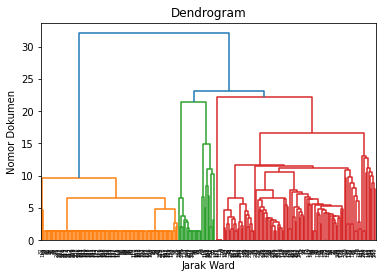

In [16]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

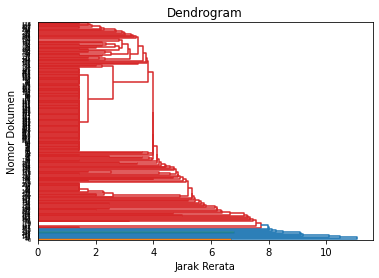

In [17]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()